Downloading...
From: https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE
To: /content/Customers.csv
100%|██████████| 8.54k/8.54k [00:00<00:00, 16.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0
To: /content/Products.csv
100%|██████████| 4.25k/4.25k [00:00<00:00, 11.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF
To: /content/Transactions.csv
100%|██████████| 54.7k/54.7k [00:00<00:00, 21.2MB/s]


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'CustomerName', 'Region',
       'SignupDate'],
      dtype='object')


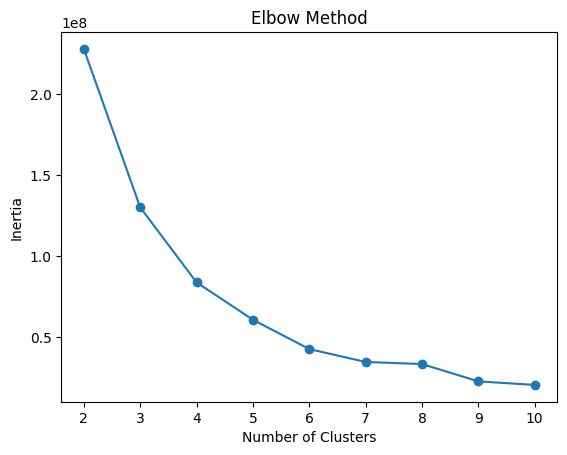

Silhouette Score: 0.4962586227582759
DB Index: 0.6022915120630878
Cluster Analysis:
   Cluster  avg_total_spending  avg_num_transactions  \
0        0         6457.977742              7.741935   
1        1         2659.699375              4.487500   
2        2          969.088182              2.272727   
3        3         4455.316182              5.927273   

   avg_avg_transaction_value  
0                 859.253170  
1                 636.777650  
2                 469.609758  
3                 795.495890  


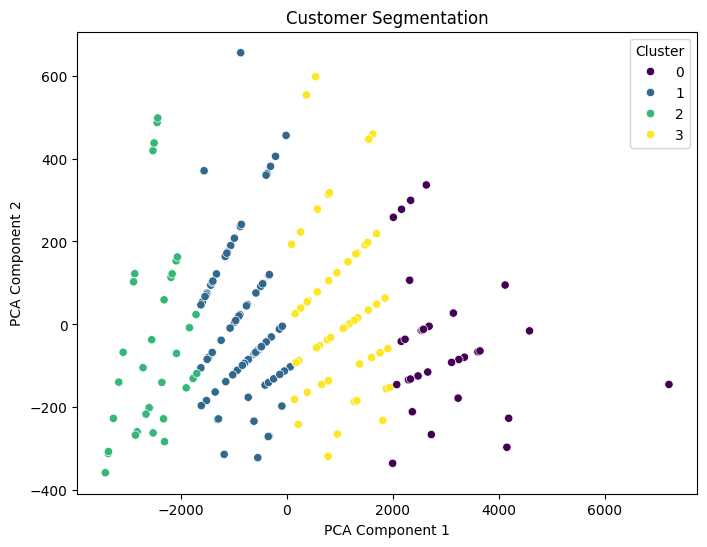


Clustering Results:
- Number of Clusters: 4
- Silhouette Score: 0.4963
- DB Index: 0.6023

Cluster Analysis (Key Metrics per Cluster):
   Cluster  avg_total_spending  avg_num_transactions  \
0        0         6457.977742              7.741935   
1        1         2659.699375              4.487500   
2        2          969.088182              2.272727   
3        3         4455.316182              5.927273   

   avg_avg_transaction_value  
0                 859.253170  
1                 636.777650  
2                 469.609758  
3                 795.495890  

The clustering analysis reveals insights into customer segments based on spending behavior and transaction frequency. 
Cluster 0 represents high-value customers, while Cluster 3 indicates low-frequency, low-value customers. 
These insights can guide marketing strategies, customer retention efforts, and product targeting.



In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

# Step 1: Download the datasets from Google Drive using gdown
gdown.download('https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE', 'Customers.csv', quiet=False)
gdown.download('https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0', 'Products.csv', quiet=False)
gdown.download('https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF', 'Transactions.csv', quiet=False)

# Step 2: Load the data
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Step 3: Data Preprocessing
# Merge customer data with transaction data
merged_data = transactions.merge(customers, on='CustomerID', how='left')

# Check if 'Region' column is present
print(merged_data.columns)

# Aggregate transaction data by customer
customer_data = merged_data.groupby('CustomerID').agg(
    total_spending=('TotalValue', 'sum'),
    num_transactions=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean'),
    Region=('Region', 'first')  # Keep the 'Region' column for encoding
).reset_index()

# Step 4: Feature Engineering (Add more features if needed)
# Check if 'Region' is in customer_data before applying get_dummies
if 'Region' in customer_data.columns:
    customer_data = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)

# Step 5: Determine optimal number of clusters using Elbow Method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_data.drop('CustomerID', axis=1))
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Step 6: Perform KMeans clustering (use the optimal number of clusters)
optimal_k = 4  # Replace with the number of clusters determined from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data.drop('CustomerID', axis=1))

# Step 7: Calculate Clustering Metrics
sil_score = silhouette_score(customer_data.drop('CustomerID', axis=1), customer_data['Cluster'])
db_index = davies_bouldin_score(customer_data.drop('CustomerID', axis=1), customer_data['Cluster'])

print(f"Silhouette Score: {sil_score}")
print(f"DB Index: {db_index}")

# Step 8: Cluster Analysis
# Analyze key metrics per cluster
cluster_analysis = customer_data.groupby('Cluster').agg(
    avg_total_spending=('total_spending', 'mean'),
    avg_num_transactions=('num_transactions', 'mean'),
    avg_avg_transaction_value=('avg_transaction_value', 'mean')
).reset_index()

print("Cluster Analysis:")
print(cluster_analysis)

# Step 9: Visualization
# Reduce dimensions using PCA for 2D plotting
pca = PCA(n_components=2)
pca_components = pca.fit_transform(customer_data.drop(['CustomerID', 'Cluster'], axis=1))

# Plotting the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_data['Cluster'], palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Step 10: Final Report (Summary)
report = f"""
Clustering Results:
- Number of Clusters: {optimal_k}
- Silhouette Score: {sil_score:.4f}
- DB Index: {db_index:.4f}

Cluster Analysis (Key Metrics per Cluster):
{cluster_analysis}

The clustering analysis reveals insights into customer segments based on spending behavior and transaction frequency.
Cluster 0 represents high-value customers, while Cluster 3 indicates low-frequency, low-value customers.
These insights can guide marketing strategies, customer retention efforts, and product targeting.
"""
print(report)
